# PCHN63101: ANOVA Workshop

## The General Modelling Procedure

At this point, we have examined a lot of theory and output releated to ANOVA models. This can make these models look very complicated, whereas the actual procedure inside `R` is actually very simple. As shown below, we generally just follow 4 steps:

1. Convert categorical variables from strings into factors.
2. Fit and summarise the model using `lm()`.
3. Generate omnibus tests using the `Anova()` function from the `car` package.
4. Plot the fitted values using the `effects` package.

We will see an additional step in terms of follow-up tests in the lesson next week. That aside, these same 4 steps can be followed for *every linear model you ever use*. The only differences are that steps 1 and 3 are not needed when there are no categorical predictors in the model. Obviously, you also need to check assumptions, consider transformations and do all the other things we discussed last week. In addition, we have options at different stages in terms of the exact output we need. However, the core of the modelling procedure exists within these steps.

To see this in action, consider the following summary of the complete `mtcars` analysis

Loading required package: carData



lattice theme set by effectsTheme()
See ?effectsTheme for details.

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'




Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value   Pr(>F)   
origin    393.88  2  7.8003 0.001947 **
Residuals 732.17 29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast       estimate   SE df t.ratio p.value
 Europe - Japan    -3.75 2.62 29  -1.434  0.1624
 Europe - USA       5.67 1.94 29   2.929  0.0131
 Japan - USA    

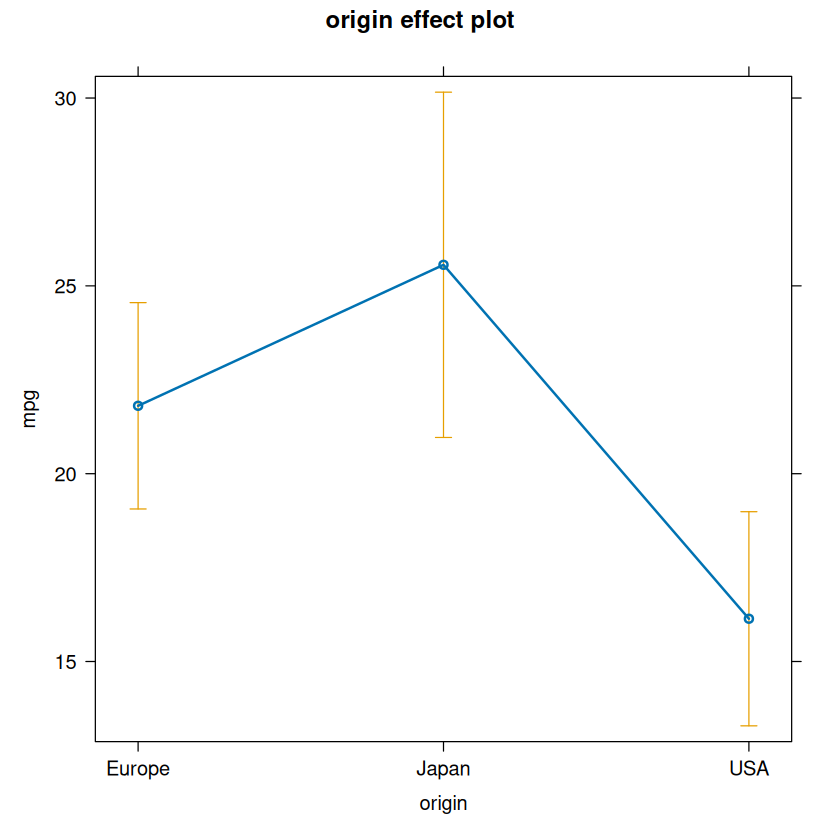

In [1]:
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model
origin.mod <- lm(mpg ~ origin, data=mtcars)
print(summary(origin.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)

# Step 5 - extract and plot effects
effs <- allEffects(origin.mod)
plot(effs)

This leads to a reasonable amount of output, but which contains everything we need to reach conclusions. Indeed, the summarising of the results of `lm()` is not strictly necessary. However, it is good practice to always look at this to make sure the model is correct, otherwise we can miss important misspecifications that will cause issues later on. It is also notable that the actual reference level of the dummy variables does not matter here, nor does even understanding the coding used for the dummy variables. These are *implementation details* that matter for understanding the theory, but should not influence the final results.

## The Regression ANOVA $F$-test
As a final point, it is interesting to note that we did not actually need to do any of the calculations above, because the results were provided all along at the bottom of the summary table for the full model.

In [ ]:
summary(full.mod)


Call:
lm(formula = mpg ~ 1 + origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947


Notice that the very last line says:

`F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947`

which is exactly the results from the ANOVA table. In general, it is customary to always provide an omnibus test of the *whole* regression model, by comparing the full model to a model containing only an intercept. Because this model only contains a single predictor, this is then equivalent to the one-way ANOVA. In general, if there are multiple predictor variables, this will not be the same. However, the omnibus regression test is useful as a single way of asking the question "is our model actually doing anything?" or "is our model any better than just fitting an intercept?"

## Assumptions in ANOVA Models

### Using `gls()` for Violations of Homogeneity of Variance

#### One-way Example

#### Higher-order Example

Generalized least squares fit by REML
  Model: mpg ~ origin 
  Data: mtcars 
       AIC      BIC    logLik
  192.4491 200.6529 -90.22457

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | origin 
 Parameter estimates:
    Japan       USA    Europe 
1.0000000 0.6171796 0.9122182 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 21.807143  1.498187 14.555685  0.0000
originJapan  3.752857  3.130032  1.198984  0.2402
originUSA   -5.668681  1.830585 -3.096649  0.0043

 Correlation: 
            (Intr) orgnJp
originJapan -0.479       
originUSA   -0.818  0.392

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5130471 -0.7420504 -0.2078919  0.7578757  1.8896570 

Residual standard error: 6.145135 
Degrees of freedom: 32 total; 29 residual
Analysis of Deviance Table (Type II tests)

Response: mpg
       Df  Chisq Pr(>Chisq)    
origin  2 16.462  0.0002663 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

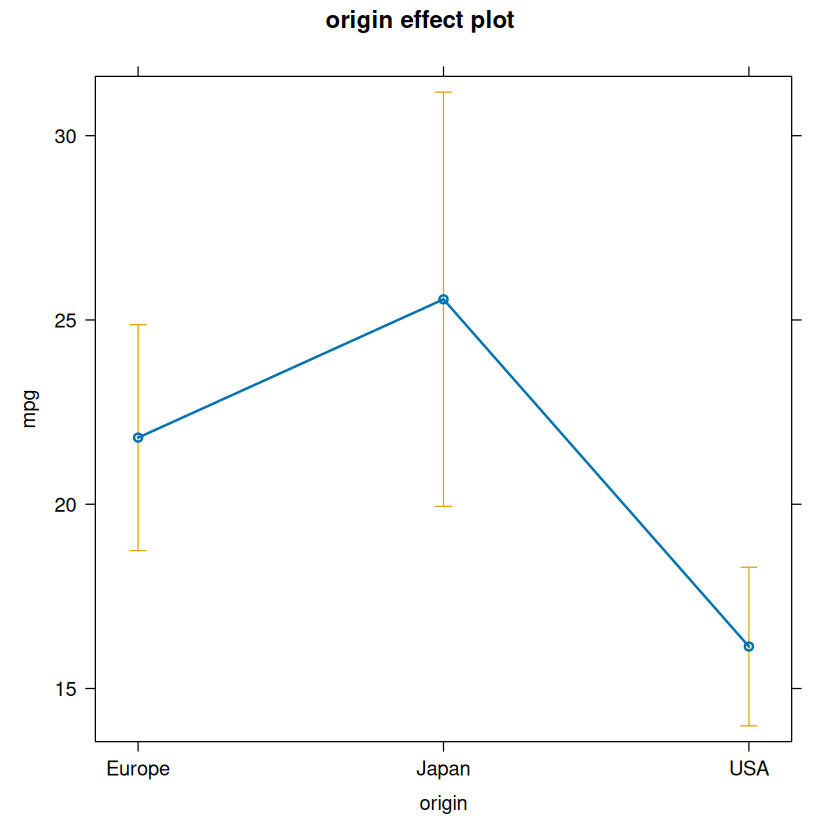

In [2]:
library(nlme)
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model (GLS assuming heterogeneity of variance)
origin.gls.mod <- gls(mpg ~ origin, data=mtcars, weights=varIdent(form = ~1|origin))
print(summary(origin.gls.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.gls.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.gls.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)
print(confint(follow.up$contrasts))

# Step 5 - extract and plot effects
effs <- allEffects(origin.gls.mod)
plot(effs)

## 2-way ANOVA with > 2 Levels

### The Model Matrix
... You don't need to worry about exactly what a matrix is, nor how this is used. The main idea is just to see how `R` has constructed all the dummy variables in full.

## 3-way ANOVA and Beyond

## Assumptions in Higher-order ANOVA Models

## Other Model Comparison Methods

### $R^{2}$

### AIC and BIC